# Sprawozdanie 1

## Jakub Ciągło (275986), Mateusz Ćwiek (276011)

In [2]:
import numpy as np
import pandas as pd

### Część 1

In [10]:

df = pd.read_csv("ankieta.csv", encoding="Latin2", sep=";")

print("Informacje o danych:")
print(df.info())

print("\nUnikalne wartości w każdej kolumnie:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DZIAŁ     200 non-null    object
 1   STAŻ      200 non-null    int64 
 2   CZY_KIER  200 non-null    object
 3   PYT_1     200 non-null    int64 
 4   PYT_2     200 non-null    int64 
 5   PYT_3     200 non-null    int64 
 6   PŁEĆ      200 non-null    object
 7   WIEK      200 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 12.6+ KB
None

Unikalne wartości w każdej kolumnie:
DZIAŁ: ['IT' 'PD' 'MK' 'HR']
STAŻ: [2 3 1]
CZY_KIER: ['Nie' 'Tak']
PYT_1: [ 1  0 -1  2 -2]
PYT_2: [-2  2  1 -1]
PYT_3: [ 1 -2  2 -1]
PŁEĆ: ['M' 'K']
WIEK: [64 67 65 68 57 58 56 47 48 53 54 37 45 43 34 27 60 52 50 51 28 26 25 32
 33 30 29 35 40 39 36 44 41 49 55 62 59 38 42 46 63 70 61]


In [12]:

df['WIEK_KAT'] = pd.cut(df['WIEK'], 
                        bins=[0, 35, 45, 55, float('inf')], 
                        labels=['do 35 lat', '36-45 lat', '46-55 lat', 'powyżej 55 lat'],
                        right=True)

print(df[['WIEK', 'WIEK_KAT']])


     WIEK        WIEK_KAT
0      64  powyżej 55 lat
1      67  powyżej 55 lat
2      65  powyżej 55 lat
3      68  powyżej 55 lat
4      65  powyżej 55 lat
..    ...             ...
195    42       36-45 lat
196    35       do 35 lat
197    39       36-45 lat
198    48       46-55 lat
199    42       36-45 lat

[200 rows x 2 columns]


In [14]:

zmienne = ['DZIAŁ', 'STAŻ', 'CZY_KIER', 'PŁEĆ', 'WIEK_KAT']

for zmienna in zmienne:
    print(f"\nTabela liczności dla {zmienna}:")
    print(df[zmienna].value_counts())



Tabela liczności dla DZIAŁ:
DZIAŁ
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64

Tabela liczności dla STAŻ:
STAŻ
2    140
1     41
3     19
Name: count, dtype: int64

Tabela liczności dla CZY_KIER:
CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64

Tabela liczności dla PŁEĆ:
PŁEĆ
M    129
K     71
Name: count, dtype: int64

Tabela liczności dla WIEK_KAT:
WIEK_KAT
36-45 lat         104
46-55 lat          45
do 35 lat          26
powyżej 55 lat     25
Name: count, dtype: int64


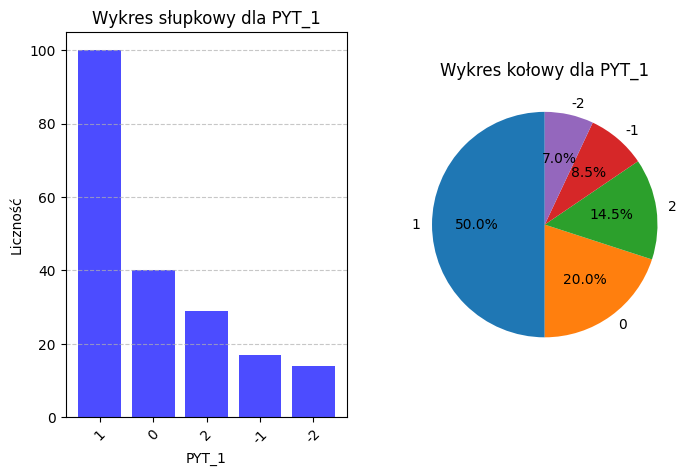

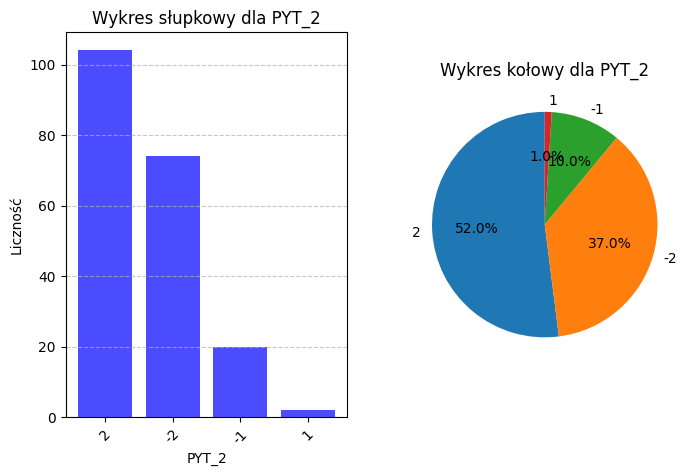

In [17]:
import matplotlib.pyplot as plt

pytania = ['PYT_1', 'PYT_2']

for pytanie in pytania:
    counts = df[pytanie].value_counts()

    plt.figure(figsize=(8, 5))
    plt.subplot(1,2,1)
    plt.bar(counts.index.astype(str), counts.values, color='blue', alpha=0.7)
    plt.xlabel(pytanie)
    plt.ylabel("Liczność")
    plt.title(f"Wykres słupkowy dla {pytanie}")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.subplot(1,2,2)
    plt.pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=90)
    plt.title(f"Wykres kołowy dla {pytanie}")
    plt.show()


In [ ]:

pary_zmiennych = [('PYT_1', 'DZIAŁ'), 
                  ('PYT_1', 'STAŻ'), 
                  ('PYT_1', 'CZY_KIER'), 
                  ('PYT_1', 'PŁEĆ'), 
                  ('PYT_1', 'WIEK_KAT')]

for zmienna1, zmienna2 in pary_zmiennych:
    print(f"\nTabela wielodzielcza dla {zmienna1} i {zmienna2}:")
    tabela = pd.crosstab(df[zmienna1], df[zmienna2])
    print(tabela)



Tabela wielodzielcza dla PYT_1 i DZIAŁ:
DZIAŁ  HR  IT  MK  PD
PYT_1                
-2      2   0   3   9
-1      2   2   3  10
 0      5   4  14  17
 1     19  15  15  51
 2      3   5  10  11

Tabela wielodzielcza dla PYT_1 i STAŻ:
STAŻ    1   2  3
PYT_1           
-2      5   5  4
-1      6  10  1
 0      8  26  6
 1     19  75  6
 2      3  24  2

Tabela wielodzielcza dla PYT_1 i CZY_KIER:
CZY_KIER  Nie  Tak
PYT_1             
-2         10    4
-1         14    3
 0         34    6
 1         88   12
 2         27    2

Tabela wielodzielcza dla PYT_1 i PŁEĆ:
PŁEĆ    K   M
PYT_1        
-2      3  11
-1      7  10
 0     14  26
 1     36  64
 2     11  18

Tabela wielodzielcza dla PYT_1 i WIEK_KAT:
WIEK_KAT  do 35 lat  36-45 lat  46-55 lat  powyżej 55 lat
PYT_1                                                    
-2                1         11          2               0
-1                6          7          1               3
 0                3         24          5              

In [20]:
pd.crosstab(df['PYT_2'], df['PYT_3'])

PYT_3,-2,-1,1,2
PYT_2,,,,
-2,49,16,5,4
-1,3,6,10,1
1,0,0,2,0
2,0,8,15,81


In [21]:

df['CZY_ZADOW'] = df['PYT_2'].replace({
    -2: 'niezadowolony',
    -1: 'niezadowolony',
     1: 'zadowolony',
     2: 'zadowolony'
})

print("\nUnikalne wartości w CZY_ZADOW:")
print(df['CZY_ZADOW'].value_counts())



Unikalne wartości w CZY_ZADOW:
CZY_ZADOW
zadowolony       106
niezadowolony     94
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

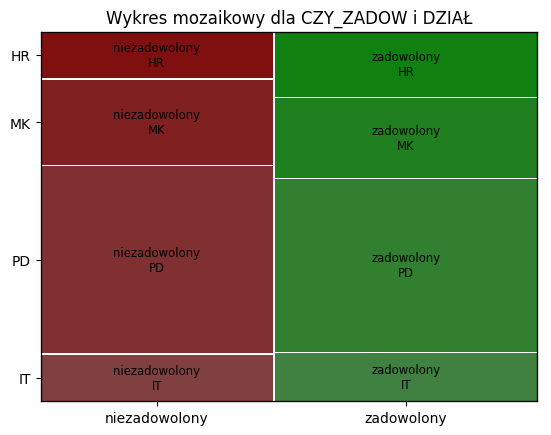

<Figure size 800x600 with 0 Axes>

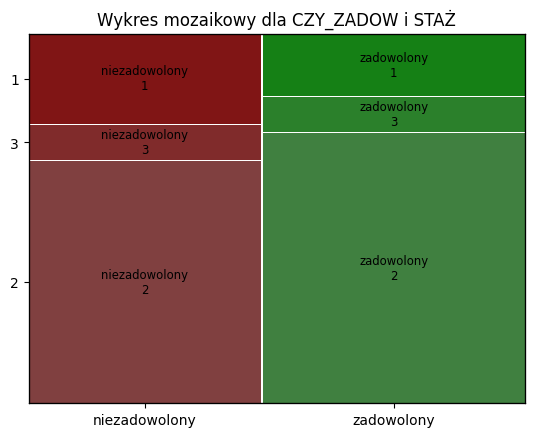

<Figure size 800x600 with 0 Axes>

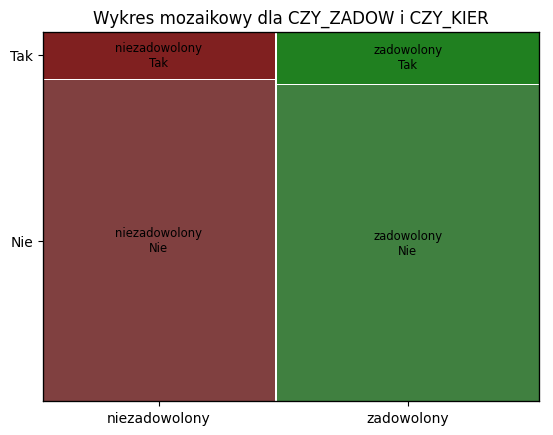

<Figure size 800x600 with 0 Axes>

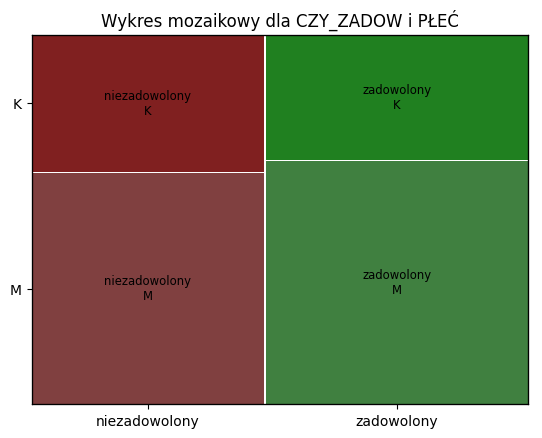

<Figure size 800x600 with 0 Axes>

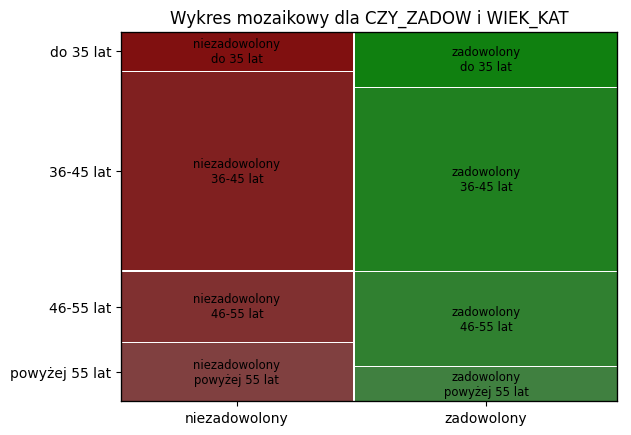

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

pary_zmiennych = [('CZY_ZADOW', 'DZIAŁ'), 
                  ('CZY_ZADOW', 'STAŻ'), 
                  ('CZY_ZADOW', 'CZY_KIER'), 
                  ('CZY_ZADOW', 'PŁEĆ'), 
                  ('CZY_ZADOW', 'WIEK_KAT')]

for zmienna1, zmienna2 in pary_zmiennych:
    plt.figure(figsize=(8, 6))
    mosaic(df, [zmienna1, zmienna2], title=f"Wykres mozaikowy dla {zmienna1} i {zmienna2}")
    plt.show()